Dataset cargado exitosamente.
Columna 'Digital_encuesta' convertida correctamente.

Columnas numéricas seleccionadas: ['Edad', 'Family_Size', 'Ingresos anuales brutos', 'Dias_cliente', 'Digital_encuesta', 'Gasto_medio_mensual_cuota']

Valores faltantes por columna:
Edad                         0
Family_Size                  0
Ingresos anuales brutos      0
Dias_cliente                 0
Digital_encuesta             0
Gasto_medio_mensual_cuota    0
dtype: int64

Número de filas después de eliminar valores faltantes: 10806

Datos estandarizados:
       Edad  Family_Size  Ingresos anuales brutos  Dias_cliente  \
0 -1.297819     0.798110                -1.189304     -0.134417   
1 -0.321216     0.152186                 1.748442      1.054800   
2  1.414966    -1.139662                -0.072779      0.550894   
3  1.414966    -0.493738                 0.737793      0.597925   
4 -0.212705     2.089958                 0.977609      0.006676   

   Digital_encuesta  Gasto_medio_mensual_cuota 

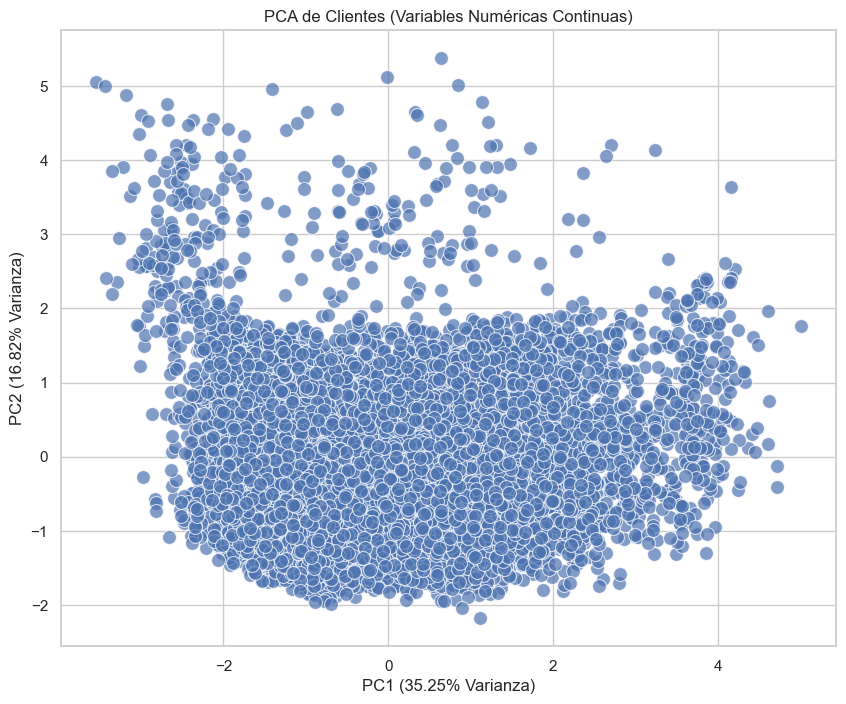

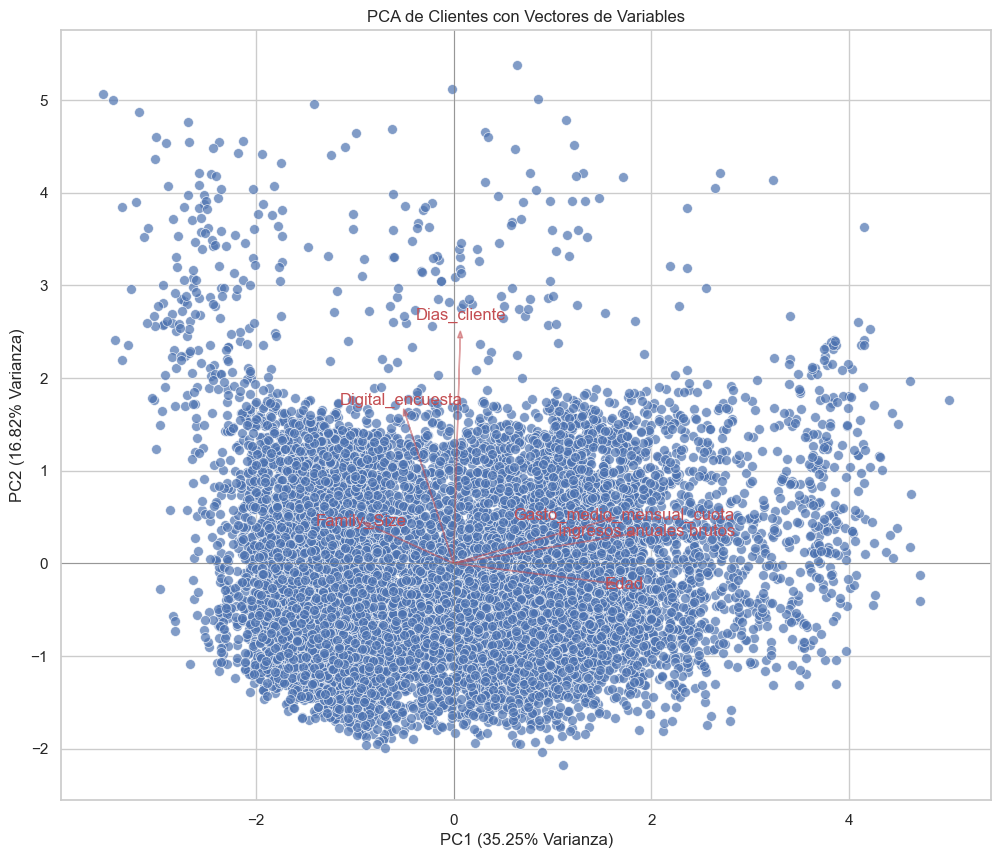


Cargas en las componentes principales:
                                PC1       PC2
Edad                       0.523032 -0.070328
Family_Size               -0.282928  0.136881
Ingresos anuales brutos    0.590388  0.104271
Dias_cliente               0.022094  0.811032
Digital_encuesta          -0.161141  0.532015
Gasto_medio_mensual_cuota  0.520938  0.156950


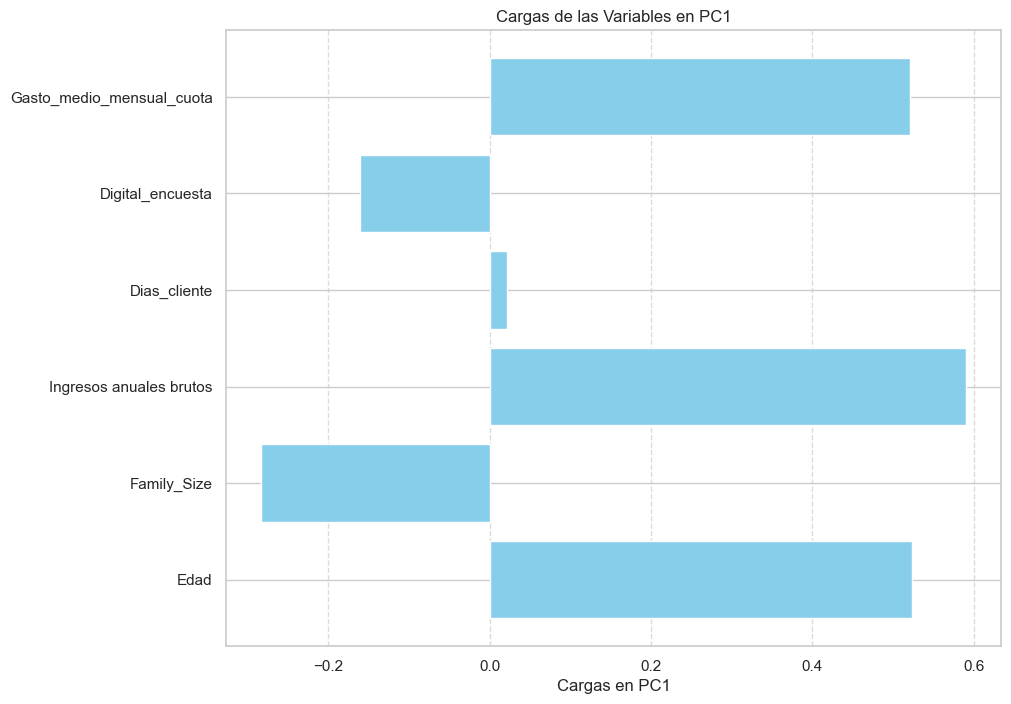

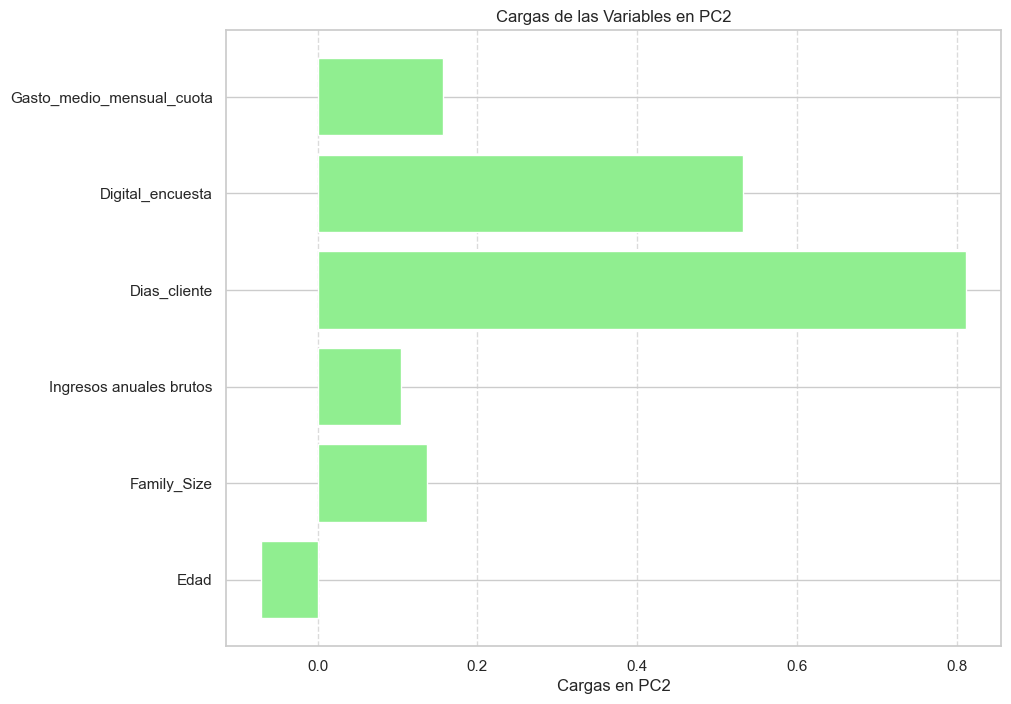

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurar estilos para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Cargar el dataset
file_path = 'Client_segment_Limpio2.csv'  # Cambia por la ruta de tu archivo
df = pd.read_csv(file_path, delimiter=";")
print("Dataset cargado exitosamente.")

# Identificar las columnas numéricas con comas decimales
columnas_con_coma = ["Digital_encuesta"]

# Convertir las comas decimales a puntos
for columna in columnas_con_coma:
    try:
        if columna in df.columns:
            # Reemplazar comas por puntos y convertir a float
            df[columna] = df[columna].str.replace(",", ".").str.strip()
            df[columna] = pd.to_numeric(df[columna], errors="coerce")  # Convertir a número
            print(f"Columna '{columna}' convertida correctamente.")
        else:
            print(f"Advertencia: la columna '{columna}' no existe en los datos.")
    except Exception as e:
        print(f"Error al procesar la columna '{columna}': {e}")
        
# 2. Seleccionar columnas numéricas
numerical_cols = ['Edad', 'Family_Size', 'Ingresos anuales brutos', 
                  'Dias_cliente', 'Digital_encuesta', 'Gasto_medio_mensual_cuota']
print("\nColumnas numéricas seleccionadas:", numerical_cols)

# 3. Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(df[numerical_cols].isnull().sum())

# Eliminar filas con valores faltantes en las columnas numéricas
df_cleaned = df[numerical_cols].dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# 4. Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)
print("\nDatos estandarizados:")
print(df_scaled.head())

# 5. Aplicar PCA
n_components = 2  # Elegimos reducir a 2 dimensiones
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])
print("\nComponentes principales:")
print(pca_df.head())

# 6. Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# 7. Visualización: Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA de Clientes (Variables Numéricas Continuas)')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# 8. Visualización: Biplot Mejorado
cargas = pca.components_.T
escalamiento = 3  # Ajusta según tus datos
cargas_scaled = cargas * escalamiento

plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)

# Dibujar vectores de las variables
for i, var in enumerate(numerical_cols):
    plt.arrow(0, 0, cargas_scaled[i, 0], cargas_scaled[i, 1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i, 0]*1.1, cargas_scaled[i, 1]*1.1, 
             var, color='r', ha='center', va='center')

plt.title('PCA de Clientes con Vectores de Variables')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# 9. Visualización: Gráficos de Cargas Separados
cargas_df = pd.DataFrame(cargas, index=numerical_cols, columns=['PC1', 'PC2'])
print("\nCargas en las componentes principales:")
print(cargas_df)

# Gráfico de Cargas para PC1
plt.figure(figsize=(10, 8))
plt.barh(cargas_df.index, cargas_df['PC1'], color='skyblue')
plt.xlabel('Cargas en PC1')
plt.title('Cargas de las Variables en PC1')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de Cargas para PC2
plt.figure(figsize=(10, 8))
plt.barh(cargas_df.index, cargas_df['PC2'], color='lightgreen')
plt.xlabel('Cargas en PC2')
plt.title('Cargas de las Variables en PC2')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


Grafica 1:
Es una representación bidimensional de los datos usando las dos primeras componentes principales (PC1 y PC2), que juntas explican el 52.07% de la varianza total (35.25% de PC1 y 16.82% de PC2).
Cada punto representa un cliente, y su posición en el gráfico se basa en una combinación ponderada de las variables originales.
La gráfica muestra que la mayoría de los puntos (clientes) están distribuidos de manera densa en una región central. Esto indica que los datos tienen una estructura relativamente compacta y homogénea para las variables seleccionadas.
Los puntos más alejados del centro pueden representar clientes atípicos o con características muy diferentes del resto.

PC1 explica la mayor parte de la varianza (35.25%), lo que sugiere que es la dimensión que captura más información relevante de las variables originales.
PC2 complementa a PC1 y explica un 16.82% adicional, pero aún deja una cantidad significativa de la varianza sin representar en este plano.


Gráfica 2:
Los vectores indican la dirección y la magnitud de la contribución de cada variable a las componentes principales.
La longitud de un vector refleja cuánta información aporta una variable a las componentes principales. Variables con vectores más largos, como Dias_cliente y Digital_encuesta, tienen mayor influencia en las dimensiones representadas por PC1 y PC2.
Las variables con vectores más cortos tienen menos peso en estas dimensiones.
Dias_cliente está orientado principalmente hacia PC1, lo que indica que contribuye más a esta componente.
Edad y Family_Size están más cerca del eje central, indicando que su aporte a PC1 y PC2 es más equilibrado.
Gasto_medio_mensual_cuota y Ingresos anuales brutos parecen estar correlacionadas, ya que sus vectores apuntan en direcciones cercanas.
Las variables cuyos vectores están opuestos están correlacionadas negativamente.

Este gráfico te permite identificar qué variables están detrás de las principales diferencias entre clientes. Por ejemplo, si las variables Dias_cliente y Digital_encuesta son las que más contribuyen a PC1, podrías priorizarlas en análisis adicionales o estrategias comerciales.





INTERPRETACION DE LAS CARGAS
----------------------------

Cargas en PC1 (35.25% de varianza explicada):
Ingresos anuales brutos (0.590388):
Esta variable tiene la mayor carga positiva en PC1, lo que significa que contribuye significativamente a esta componente. En términos prácticos, PC1 captura una dimensión del dataset que está muy influenciada por el nivel de ingresos.

Edad (0.523032) y Gasto_medio_mensual_cuota (0.520938):
Ambas variables tienen también altas cargas positivas, lo que indica que están fuertemente relacionadas con PC1. Esto sugiere que hay una relación entre estas tres variables: a mayor edad e ingresos, mayor gasto medio mensual.

Family_Size (-0.282928):
Esta variable tiene una carga negativa en PC1. Esto implica que, a medida que aumenta el tamaño familiar, disminuye la puntuación en esta componente, lo que podría reflejar una relación inversa con las otras variables como ingresos o gasto.



Cargas en PC2 (16.82% de varianza explicada):
Dias_cliente (0.811032):
Esta variable domina en PC2, con una carga significativamente alta. Esto indica que PC2 está principalmente relacionado con la duración de los días que un cliente ha estado registrado o activo.
Digital_encuesta (0.532015):
También tiene una contribución importante en PC2, sugiriendo que esta componente representa la relación entre el tiempo que un cliente ha estado activo y si utiliza servicios digitales.
Gasto_medio_mensual_cuota (0.156950) y Ingresos anuales brutos (0.104271):
Estas variables tienen una ligera influencia positiva en PC2, pero su peso es mucho menor comparado con Dias_cliente o Digital_encuesta.




Las variables con cargas altas y del mismo signo (por ejemplo, Ingresos anuales brutos, Edad, y Gasto_medio_mensual_cuota en PC1) están correlacionadas positivamente en el espacio reducido.
Family_Size tiene una carga negativa en PC1, lo que sugiere que se relaciona inversamente con las otras variables de esta componente.


Conclusión sobre las componentes:
-----------------------------------

PC1: Representa una combinación lineal de variables que parece estar más influenciada por ingresos, edad y gasto medio mensual, con una posible influencia inversa del tamaño familiar.
PC2: Captura una dimensión distinta, donde la variable dominante es días como cliente, acompañada por el uso de servicios digitales.

Estas cargas pueden ayudarte a interpretar qué aspectos del comportamiento o características de los clientes están más representados en las componentes principales. Por ejemplo:

Si quisieras enfocarte en segmentar clientes con base en su antigüedad, deberías prestar atención a PC2.
Si te interesa el análisis financiero (ingresos y gastos), PC1 sería más relevante.

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


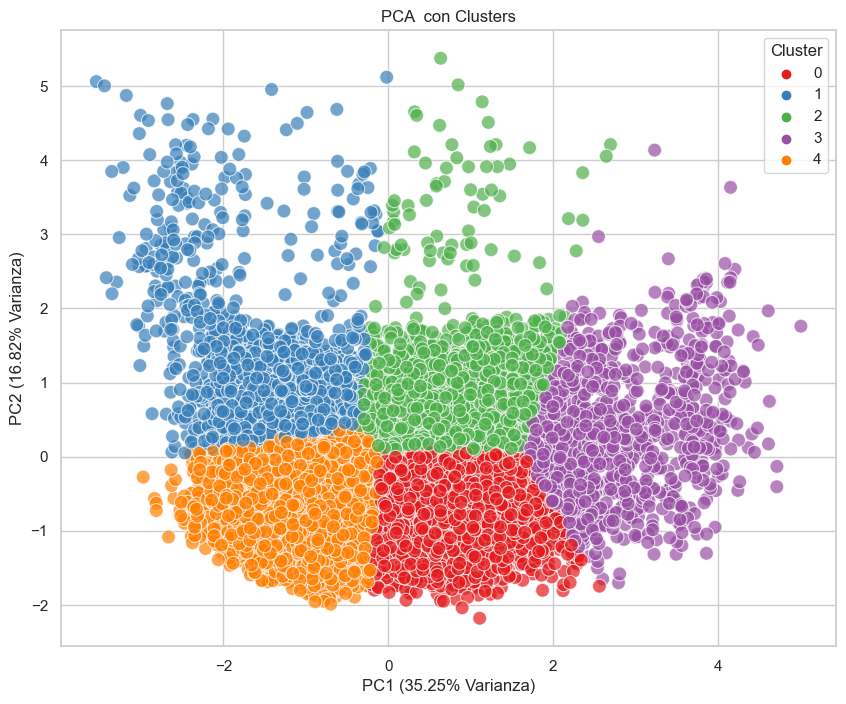

In [4]:
from sklearn.cluster import KMeans

# Determinar el número óptimo de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Añadir clusters al DataFrame
pca_df['Cluster'] = clusters

# Visualizar
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA  con Clusters')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

Dataset cargado exitosamente.

La columna 'ID' ha sido eliminada correctamente.

Columnas numéricas: ['Unnamed: 0', 'Edad', 'Family_Size', 'anno_nacimiento', 'Ingresos anuales brutos', 'Gasto_medio_mensual_cuota', 'Abandono', 'Dias_cliente']

Variables binarias (0 y 1): ['Abandono']

Variables numéricas continuas: ['Unnamed: 0', 'Edad', 'Family_Size', 'anno_nacimiento', 'Ingresos anuales brutos', 'Gasto_medio_mensual_cuota', 'Dias_cliente']

Variables numéricas continuas seleccionadas para clustering: ['Unnamed: 0', 'Edad', 'Family_Size', 'anno_nacimiento', 'Ingresos anuales brutos', 'Gasto_medio_mensual_cuota', 'Dias_cliente']

Valores faltantes por columna:
Unnamed: 0                   0
Edad                         0
Family_Size                  0
anno_nacimiento              0
Ingresos anuales brutos      0
Gasto_medio_mensual_cuota    0
Dias_cliente                 0
dtype: int64

Número de filas después de eliminar valores faltantes: 10806


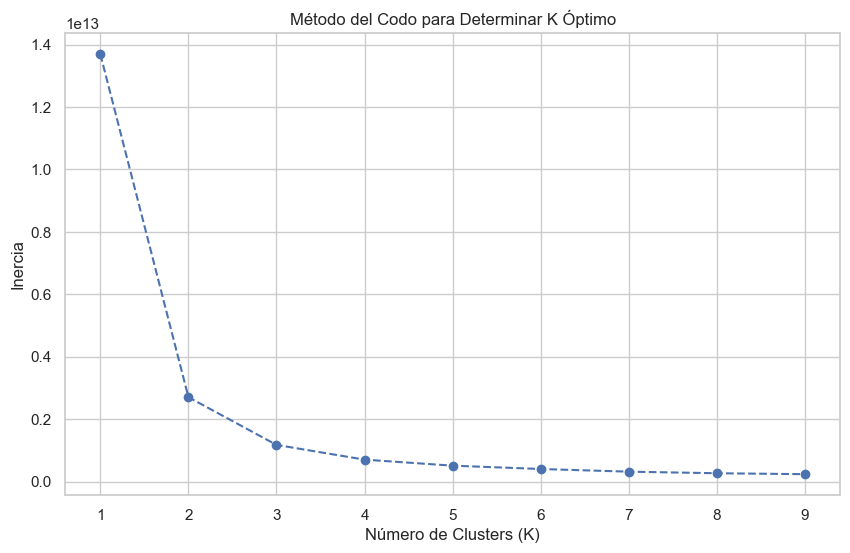

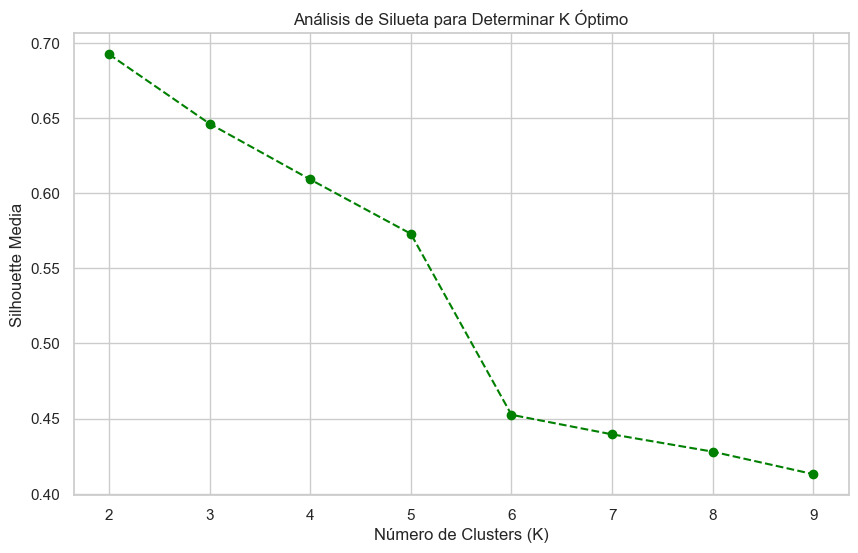


Asignación de Clusters:
   Unnamed: 0  Edad  Family_Size  anno_nacimiento  Ingresos anuales brutos  \
0           0    24            4             2000                    13945   
1           1    42            3             1982                   118107   
2           2    74            1             1950                    53533   
3           3    74            2             1950                    82273   
4           4    44            6             1980                    90776   

   Gasto_medio_mensual_cuota  Dias_cliente  Cluster  
0                         30           278        2  
1                         30           455        4  
2                         50           380        0  
3                         50           387        3  
4                         30           299        1  


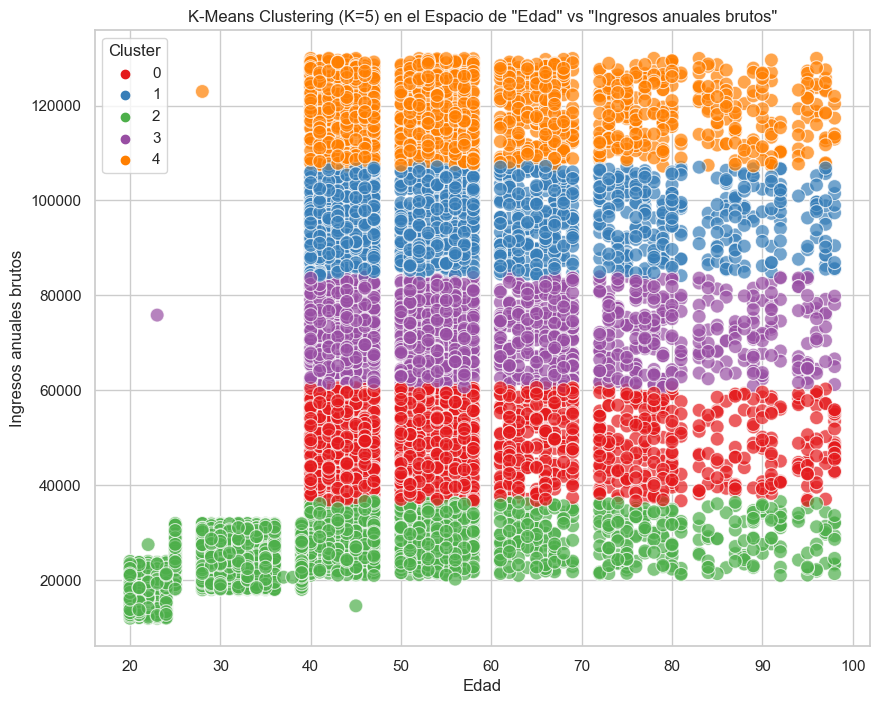

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Configurar estilos para visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Cargar el dataset
file_path = r'Client_segment_Limpio2.csv'  # Cambia esto por la ruta real de tu archivo

try:
    df = pd.read_csv(file_path, delimiter=";")
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo en la ruta '{file_path}' no se encontró.")
    exit()
except pd.errors.ParserError:
    print("Error: El archivo no se pudo analizar. Verifica el formato del CSV.")
    exit()

# 2. Eliminar la columna 'ID' si existe
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("\nLa columna 'ID' ha sido eliminada correctamente.")
else:
    print("\nLa columna 'ID' no está presente en el DataFrame.")

# 3. Identificar variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

# Identificar variables continuas y categóricas binarias
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print("\nVariables binarias (0 y 1):", binary_cols)
print("\nVariables numéricas continuas:", continuous_cols)

# 4. Seleccionar solo variables numéricas continuas para el clustering
df_continuous = df[continuous_cols]
print("\nVariables numéricas continuas seleccionadas para clustering:", df_continuous.columns.tolist())

# 5. Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(df_continuous.isnull().sum())

# Eliminar filas con valores faltantes
df_cleaned = df_continuous.dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# 6. Método del Codo
inercia = []
rangos_k = range(1, 10)  # Reducido para simplificar análisis

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    inercia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(10, 6))
plt.plot(rangos_k, inercia, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(rangos_k)
plt.grid(True)
plt.show()

# 7. Análisis de Silueta
silhueta_media = []
rangos_k_sil = range(2, 10)

for k in rangos_k_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cleaned)
    sil_score = silhouette_score(df_cleaned, labels)
    silhueta_media.append(sil_score)

# Graficar el Análisis de Silueta
plt.figure(figsize=(10, 6))
plt.plot(rangos_k_sil, silhueta_media, marker='o', linestyle='--', color='green')
plt.title('Análisis de Silueta para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Media')
plt.xticks(rangos_k_sil)
plt.grid(True)
plt.show()

# 8. Aplicar K-Means con K óptimo
k_optimo = 5  # Ajusta según los análisis del Método del Codo y Silueta
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_cleaned)

# Añadir los labels de los clusters al DataFrame limpio
df_cleaned['Cluster'] = clusters

print("\nAsignación de Clusters:")
print(df_cleaned.head())

# 9. Visualización de Clusters
if 'Edad' in df_cleaned.columns and 'Ingresos anuales brutos' in df_cleaned.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Edad', y='Ingresos anuales brutos', hue='Cluster', data=df_cleaned, palette='Set1', s=100, alpha=0.7)
    plt.title(f'K-Means Clustering (K={k_optimo}) en el Espacio de "Edad" vs "Ingresos anuales brutos"')
    plt.xlabel('Edad')
    plt.ylabel('Ingresos anuales brutos')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
else:
    print("\nVariables para visualización no disponibles.")


In [ ]:
NOS PROPORCIONA EL NUMERO DE CLUSTER ÓPTIMO Y OBSERVAMOS QUE ES 5 YA QUE CON EL GRAFICO DEL MÉTODO DEL CODO Y EL GRÁFICO DE LA SILUETA
SE OBSERVA COMO DISMINUYE LA MEDIA A PARTIR DEL CLUSTER 5

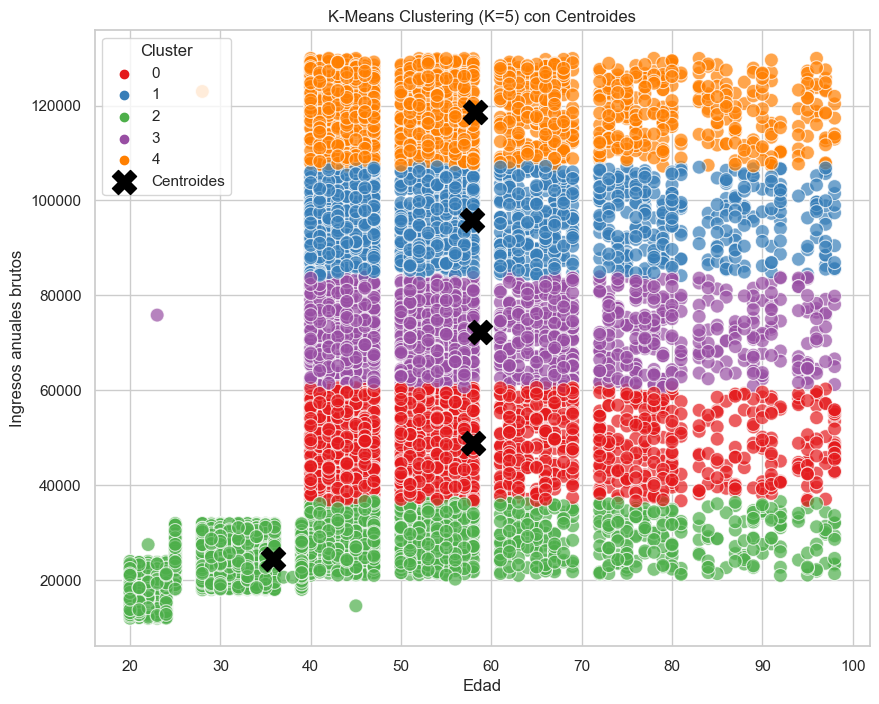

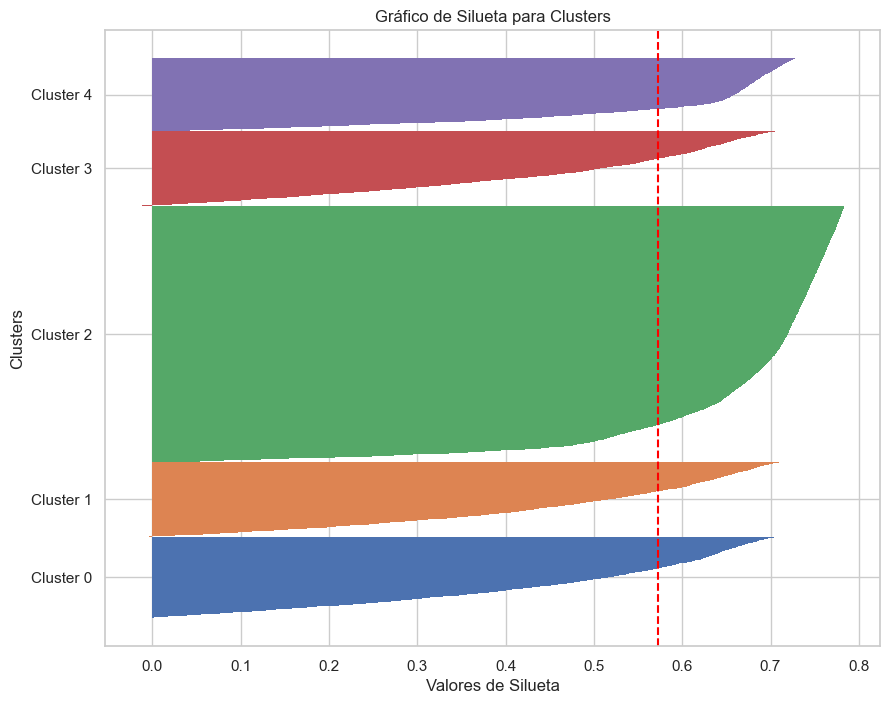

In [6]:
from sklearn.metrics import silhouette_samples

# Gráfico de Clusters con Centroides
if 'Edad' in df_cleaned.columns and 'Ingresos anuales brutos' in df_cleaned.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Edad', y='Ingresos anuales brutos', hue='Cluster', data=df_cleaned, palette='Set1', s=100, alpha=0.7)
    # Añadir los centroides
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, continuous_cols.index('Edad')], centroids[:, continuous_cols.index('Ingresos anuales brutos')],
                s=300, c='black', marker='X', label='Centroides')
    plt.title(f'K-Means Clustering (K={k_optimo}) con Centroides')
    plt.xlabel('Edad')
    plt.ylabel('Ingresos anuales brutos')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
else:
    print("\nVariables para visualización no disponibles.")

# Gráfico de Silueta para cada Cluster
silhouette_vals = silhouette_samples(df_cleaned.drop('Cluster', axis=1), df_cleaned['Cluster'])
y_ticks = []
y_lower, y_upper = 0, 0
plt.figure(figsize=(10, 8))

for i in range(k_optimo):
    cluster_sil_vals = silhouette_vals[df_cleaned['Cluster'] == i]
    cluster_sil_vals.sort()
    y_upper += len(cluster_sil_vals)
    plt.barh(range(y_lower, y_upper), cluster_sil_vals, edgecolor='none', height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_sil_vals)

plt.axvline(x=silhouette_score(df_cleaned.drop('Cluster', axis=1), df_cleaned['Cluster']), color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cluster {i}' for i in range(k_optimo)])
plt.ylabel('Clusters')
plt.xlabel('Valores de Silueta')
plt.title('Gráfico de Silueta para Clusters')
plt.grid(True)
plt.show()
